PPCA lavora con più variabili osservabili anzichè una sola

In [1]:
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt
import aesara.tensor as at
import arviz as az
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
from scipy import stats
import scipy
import pandas as pd

WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
scaler = StandardScaler()

In [3]:
#data = np.load('prova.npy', allow_pickle=True).item()

# extract data social anxiety

In [4]:
#csv_ = '/Users/marcoghezzi/PycharmProjects/pythonProject/osfstorage-archive/behavior/LookAtMe_002.csv'
csv_ = '/home/paolo/matteo/matteo/unimi/tesi_master/code/osfstorage-archive/behavior/LookAtMe_002.csv'
global_data = pd.read_csv(csv_, sep='\t')
y = np.array(list([int(d>2) for d in global_data['rating']]))
e_labels = y[:,np.newaxis]  # rating > 2

In [5]:
print(len(e_labels))

160


In [6]:
num_trials_to_remove = 48

In [7]:
e_labels= e_labels[num_trials_to_remove:]

In [8]:
print(len(e_labels))

112


In [9]:
N_e = e_labels.shape[0]
D_e = e_labels.shape[1]
print(N_e,D_e)

112 1


## test with new data

In [10]:
import deepemogp.feature_extractor as feature_extractor
import deepemogp.signal.physio as physio
import deepemogp.signal.face as face
import deepemogp.signal.annotation as annotation
import deepemogp.datasets as datasets
import deepemogp.signal.behavior as behavior

# from: https://github.com/SheffieldML/GPy
#import GPy
# from: https://github.com/SheffieldML/PyDeepGP
#import deepgp

import pandas as pd
import numpy as np

show = False
# definition of the feature extractors to be used later
f2 = feature_extractor.FE('wavelet', window=(2, 1))
f3 = feature_extractor.FE('mean', window=(1,0))

# definition of the physiological signals to be extracted
eda_ = physio.EDA(f2)
hr_ = physio.HR(f2)
pupil_ = behavior.PUPIL(f3)

# definition of the emotional annotation to be extracted
#va = annotation.VA('valence', f3)
#ar = annotation.VA('arousal', f3)
# extraction of the desired data from the dataset
d = datasets.FEAR(signals={hr_,pupil_,eda_}, subjects={'2'})

for s in d.signals:
    # preprocess ...
    if s.name =='EDA':
        s.preprocess(show=show,new_fps=500)
        s.feature_ext.extract_feat(s,show=show)
    else:
        s.feature_ext.extract_feat_without_preprocess(s, show=show)

    #add feature extraction for eda before preprocessing

    # ... and extract features from each signal type


for sig in d.signals:
    if sig.name=='EDA':
        eda_data = sig.features
    if sig.name=='HR':
        hr_data = sig.features
    if sig.name=='PUPIL':
        pupil_data = sig.features

>> Loading PUPIL for subject 2 and all sessions from dataset FEAR
>> Loading HR for subject 2 and all sessions from dataset FEAR
>> Loading EDA for subject 2 and all sessions from dataset FEAR
>> Extracting mean features from PUPIL signal, adopting (1, 0) window ...
>> Extracting wavelet features from HR signal, adopting (2, 1) window ...
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
p

In [11]:
'''for sig in d.signals:
    print (sig.name)
    print (sig.features)'''

'for sig in d.signals:\n    print (sig.name)\n    print (sig.features)'

In [12]:
list(d.signals)[0].name
d.signals

{<deepemogp.signal.physio.eda.EDA at 0x7fc727bf1a30>,
 <deepemogp.signal.behavior.pupil.PUPIL at 0x7fc72657ba30>}

In [13]:
np.array(hr_data)

array([[-0.64188783, -0.68497159, -0.64642643, ..., -1.36232328,
         0.46433581,  0.489405  ],
       [-1.00544987, -1.43820783, -1.54146452, ...,  0.51984375,
         0.68324008, -0.98227022],
       [ 1.05486422,  1.00036774,  0.80219155, ...,  0.74046552,
        -0.97399816, -0.45701132],
       ...,
       [-0.81613236, -0.89156174, -1.08158321, ..., -0.60326427,
         0.67988462, -2.75543333],
       [-0.80968483, -0.82132205, -0.82065559, ...,  0.07854003,
         0.9353287 , -1.74339795],
       [-2.30642018, -2.28780647, -2.46136754, ...,  0.76230065,
        -0.38713393, -0.909278  ]])

In [14]:
TRIAL = 160

In [15]:
hr =np.array(hr_data)
hr

array([[-0.64188783, -0.68497159, -0.64642643, ..., -1.36232328,
         0.46433581,  0.489405  ],
       [-1.00544987, -1.43820783, -1.54146452, ...,  0.51984375,
         0.68324008, -0.98227022],
       [ 1.05486422,  1.00036774,  0.80219155, ...,  0.74046552,
        -0.97399816, -0.45701132],
       ...,
       [-0.81613236, -0.89156174, -1.08158321, ..., -0.60326427,
         0.67988462, -2.75543333],
       [-0.80968483, -0.82132205, -0.82065559, ...,  0.07854003,
         0.9353287 , -1.74339795],
       [-2.30642018, -2.28780647, -2.46136754, ...,  0.76230065,
        -0.38713393, -0.909278  ]])

In [16]:
hr = hr.reshape((TRIAL, int(hr.shape[0]/TRIAL*hr.shape[1])))
hr= hr[num_trials_to_remove:]
hr

array([[-0.77180735, -0.75848481, -0.68788155, ..., -0.03910701,
        -1.72757775,  3.35285881],
       [ 1.0351642 ,  0.97745557,  0.77625059, ...,  0.86814207,
        -0.58304239, -0.67449343],
       [-1.60183757, -1.60312032, -1.78704701, ...,  0.60796705,
        -0.81168922, -0.77859293],
       ...,
       [-0.55806097, -0.60984793, -0.51304214, ...,  0.09806073,
         0.12308417, -1.07480292],
       [-1.01631131, -1.0172051 , -1.02552677, ..., -0.54214066,
         0.64236454, -2.13375278],
       [ 1.88518587,  1.9495498 ,  2.07482153, ...,  0.76230065,
        -0.38713393, -0.909278  ]])

In [17]:
pupil = np.array(pupil_data)
pupil = pupil.reshape((TRIAL, int(pupil.shape[0]/TRIAL*pupil.shape[1])))
pupil = pupil[num_trials_to_remove:]
pupil

array([[2.33372992, 2.2672998 , 2.28121436, 2.21836641, 2.21860167],
       [2.35727279, 2.27466403, 2.21446166, 2.17768964, 2.24287888],
       [2.318687  , 2.23565502, 2.18352482, 2.17011912, 2.18306722],
       [2.32618146, 2.2327711 , 2.24755403, 2.1815223 , 2.19397238],
       [2.25490988, 2.33438524, 2.22599252, 2.17656458, 2.21151948],
       [2.10284645, 2.08888928, 2.13231602, 2.11293192, 2.16635923],
       [2.08855976, 2.122201  , 2.09973099, 2.04554276, 2.06618755],
       [2.25488119, 2.2382911 , 2.18656922, 2.18653881, 2.29442138],
       [2.2141227 , 2.23132342, 2.13866966, 2.09909012, 2.13415009],
       [2.08271592, 2.05355972, 2.10047743, 2.04554961, 2.09951312],
       [2.23304812, 2.23903146, 2.17899607, 2.10586485, 2.13980231],
       [2.11414993, 2.08318628, 2.12539779, 2.09533906, 2.18188512],
       [2.07328851, 2.05648962, 2.08013583, 2.05522422, 2.06136614],
       [2.1158641 , 2.14429068, 2.13416839, 2.05120505, 2.13048432],
       [2.15579436, 2.13061249, 2.

In [18]:
eda = np.array(eda_data)
eda = eda.reshape((TRIAL,int(eda.shape[0]/TRIAL*eda.shape[1])))
eda = eda[num_trials_to_remove:]
eda

array([[ 0.24383524,  0.24603544,  0.2049703 , ...,  0.13000034,
         0.31056076,  0.45020486],
       [ 0.4675384 ,  0.47162279,  0.3892714 , ..., 30.76653542,
        29.39942508, 27.97637289],
       [ 0.43222557,  0.43591067,  0.35733971, ...,  8.3848607 ,
         9.61265338, 10.04141263],
       ...,
       [ 0.52305515,  0.527481  ,  0.4314948 , ..., 18.56561272,
        16.87531875, 15.37726661],
       [ 0.68930567,  0.69591183,  0.59020624, ...,  7.62950238,
         7.31481086,  7.07995644],
       [ 0.09128735,  0.09187005,  0.07001833, ..., 32.06907577,
        43.05623848, 48.50375499]])

## end test

prendo un'implementazione di sppca e la applico al nostro caso

different types of observable data

1) gaze
2) fisio
    2.1) heart rate variability
    2.2) eda phasic value
3) social anxiety
4) aspettativa del dolore

In [19]:

'''social_anx = data['social anxiety'][:,np.newaxis]
pain_exp = data['pain expectation'][:,np.newaxis]'''


"social_anx = data['social anxiety'][:,np.newaxis]\npain_exp = data['pain expectation'][:,np.newaxis]"

In [20]:
print(pupil.shape)
print(hr.shape)
print(eda.shape)

(112, 5)
(112, 60)
(112, 60)


In [21]:
N_pupil = pupil.shape[0]
D_pupil = pupil.shape[1]

N_hr = hr.shape[0]
D_hr = hr.shape[1]

N_eda = eda.shape[0]
D_eda = eda.shape[1]
K = 1

print(N_pupil,D_pupil)
print(N_hr,D_hr)
print(N_eda,D_eda)
print(N_e, D_e)

112 5
112 60
112 60
112 1


In [22]:
with pm.Model() as sPPCA:
    #dati osservabili
    hr_data = pm.MutableData("hr_data", hr.T)
    pupil_data = pm.MutableData("pupil_data", pupil.T)
    eda_data = pm.MutableData("eda_data", eda.T)

    e_data = pm.ConstantData("e_data", e_labels.T)

    #matrici pesi
    Whr = pm.Normal('Whr', mu=at.zeros([D_hr, K]), sigma=2.0 * at.ones([D_hr, K]), shape=[D_hr, K])
    Wpupil = pm.Normal('Wpupil', mu=at.zeros([D_pupil, K]), sigma=2.0 * at.ones([D_pupil, K]), shape=[D_pupil, K])

    Weda = pm.Normal('Weda', mu=at.zeros([D_eda, K]), sigma=2.0 * at.ones([D_eda, K]), shape=[D_eda, K])

    #weight matrix for pain expectation.
    #check mu,sigma,shape
    We = pm.Normal('W_e', mu=at.zeros([D_e, K]), sigma=2.0 * at.ones([D_e,K]), shape=[D_e, K])

    #latent space
    c = pm.Normal('c', mu=at.zeros([N_hr,K]), sigma=at.ones([N_hr,K]), shape=[N_hr,K])

    # dati dell'hrv interpretati come una gaussiana
    x_hr = pm.Normal('x_hr', mu=Whr.dot(c.T), sigma=at.ones([D_hr,N_hr]) ,shape=[D_hr, N_hr], observed=hr_data)
    # dati della dilatazione pupille interpretati come una gaussiana
    x_pupil = pm.Normal('x_pupil', mu=Wpupil.dot(c.T), sigma=at.ones([D_pupil, N_pupil]), shape=[D_pupil, N_pupil], observed=pupil_data)
    #eda
    x_eda = pm.Normal('x_eda',mu=Weda.dot(c.T),sigma= at.ones([D_eda,N_pupil]), shape=[D_eda,N_eda], observed=eda_data)

    # pain expectation. ciò che dovremmo inferire dato c
    # due strade: binary o multiclass (1-4)
    # p = probability of success?
    x_e = pm.Bernoulli('x_e' , p=pm.math.sigmoid(We.dot(c.T)) , shape =[D_e, N_e], observed=e_data)

    #x_hr = pm.Bernoulli('x_hr', p=pm.math.sigmoid(Whr.dot(c.T)), shape=[D_hr, N_hr], observed=hr_data)
    #x_eda = pm.Bernoulli('x_eda', p=pm.math.sigmoid(Weda.dot(c.T)), shape=[D_eda, N_eda], observed=eda_data)

In [23]:
gv = pm.model_to_graphviz(sPPCA)
gv.view()

'.gv.pdf'

In [24]:
sPPCA.free_RVs

[Whr ~ N(f(), f()),
 Wpupil ~ N(f(), f()),
 Weda ~ N(f(), f()),
 W_e ~ N(f(), f()),
 c ~ N(f(), f())]

In [25]:
with sPPCA:
    trace = pm.sample(1000,init='advi+adapt_diag',chains=1,progressbar=True,target_accept=0.95)

qt5ct: using qt5ct plugin
Invalid Context= "Apps" line for icon theme:  "/usr/share/icons/Mint-Y/apps/16/"
Invalid Context= "Apps" line for icon theme:  "/usr/share/icons/Mint-Y/apps/16@2x/"
Invalid Context= "Mimetypes" line for icon theme:  "/usr/share/icons/Mint-Y/mimetypes/16/"
Invalid Context= "Mimetypes" line for icon theme:  "/usr/share/icons/Mint-Y/mimetypes/16@2x/"
Invalid Context= "Apps" line for icon theme:  "/usr/share/icons/Mint-Y/apps/22/"
Invalid Context= "Apps" line for icon theme:  "/usr/share/icons/Mint-Y/apps/22@2x/"
Invalid Context= "Apps" line for icon theme:  "/usr/share/icons/Mint-Y/apps/24/"
Invalid Context= "Apps" line for icon theme:  "/usr/share/icons/Mint-Y/apps/24@2x/"
Invalid Context= "Mimetypes" line for icon theme:  "/usr/share/icons/Mint-Y/mimetypes/24/"
Invalid Context= "Mimetypes" line for icon theme:  "/usr/share/icons/Mint-Y/mimetypes/24@2x/"
Invalid Context= "Apps" line for icon theme:  "/usr/share/icons/Mint-Y/apps/32/"
Invalid Context= "Apps" line

Convergence achieved at 39300
Interrupted at 39,299 [19%]: Average Loss = 3.0961e+05
Sequential sampling (1 chains in 1 job)
NUTS: [Whr, Wpupil, Weda, W_e, c]


Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 54 seconds.


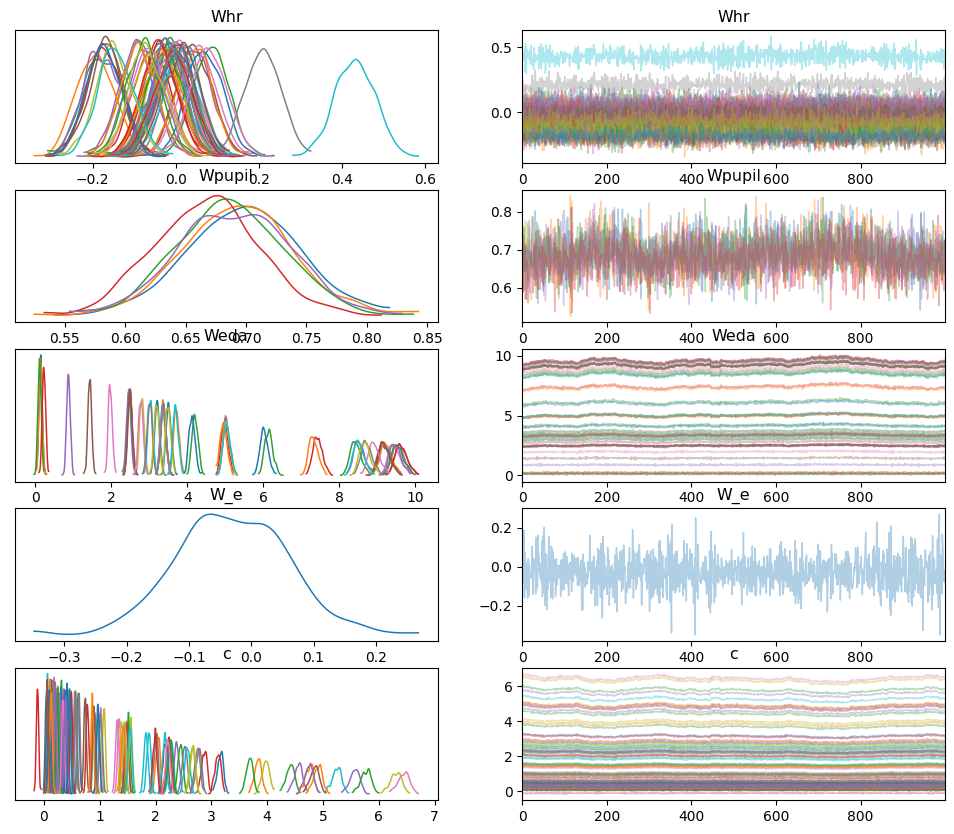

In [26]:
#az.plot_posterior(mean_field.sample(1000), color="LightSeaGreen")
az.plot_trace(trace)
plt.show()

In [27]:
with sPPCA:
    # update values of predictors:
    pm.set_data({"pupil_data": pupil,"hr_data":hr,"eda_data":eda})
    # use the updated values and predict outcomes and probabilities:
    posterior_predictive = pm.sample_posterior_predictive(
        trace, random_seed=123)

Sampling: [x_e, x_eda, x_hr, x_pupil]


In [28]:
e_pred = posterior_predictive.posterior_predictive["x_e"]

In [29]:
e_pred

<xarray.DataArray 'x_e' (chain: 1, draw: 1000, x_e_dim_0: 1, x_e_dim_1: 112)>
array([[[[1, 0, 0, ..., 0, 0, 1]],

        [[1, 0, 0, ..., 1, 0, 0]],

        [[1, 1, 0, ..., 0, 1, 0]],

        ...,

        [[1, 1, 0, ..., 0, 0, 1]],

        [[1, 1, 0, ..., 0, 0, 1]],

        [[0, 1, 0, ..., 0, 1, 1]]]])
Coordinates:
  * chain      (chain) int64 0
  * draw       (draw) int64 0 1 2 3 4 5 6 7 ... 992 993 994 995 996 997 998 999
  * x_e_dim_0  (x_e_dim_0) int64 0
  * x_e_dim_1  (x_e_dim_1) int64 0 1 2 3 4 5 6 7 ... 105 106 107 108 109 110 111

In [30]:
e_pred_mode = np.squeeze(stats.mode(e_pred[0], keepdims=False)[0])[:,np.newaxis]

In [31]:
e_pred_mode

array([[1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [32]:
e_labels

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
    

In [33]:
train_accuracy_exp = accuracy_score(e_labels, e_pred_mode)
print('\n\tTrain Accuracy Pain Expectation: ' + str(train_accuracy_exp))
print(' ')


	Train Accuracy Pain Expectation: 0.5178571428571429
 


--------------------------------------------------------------------------------------------

In [34]:
hr_pred_mean = (stats.median_abs_deviation(hr_pred[0]))[0]
hr_pred_mean

NameError: name 'hr_pred' is not defined

In [ ]:
hr[0]

In [ ]:
#hr_pred_mode= pd.Series([0.006,0.01,0.02,0.003])

hr and hr_pred_mode devono avere same shape

In [ ]:
train_accuracy_hr = (np.subtract(hr[0], hr_pred_mean))
print('\n\t avg distance hr: \n' + str(train_accuracy_hr))
#print(' ')

In [ ]:
with sPPCA:
    # update values of predictors:
    pm.set_data({"hr_data": hr})
    # use the updated values and predict outcomes and probabilities:
    posterior_predictive = pm.sample_posterior_predictive(
        trace, random_seed=123)
    gaze_pred = posterior_predictive.posterior_predictive["x_gaze"]

In [ ]:
gaze_pred

In [ ]:
gaze_pred_mean = np.mean(gaze_pred, axis=0).T.reshape(-1)
gaze_true = pupil.reshape(-1)
reconstructed_r2 = metrics.r2_score(gaze_true, gaze_pred_mean)

print('\n\tReconstructed X R2 score: ' + str(reconstructed_r2))

In [ ]:
import deepemogp.feature_extractor as feature_extractor

In [ ]:
f = feature_extractor.FE('wavelet', window=(8,6), params={'w_mother':'db3','w_maxlev':1})

In [ ]:
x = [3, 7, 1, 1, -2, 5, 4, 6]

In [ ]:
f.apply(x)